<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

- **YOLOv5 의 공식 노트북** 
- GPL-3.0 license 
- https://github.com/ultralytics/yolov5
- https://ultralytics.com



# 1-Setup

Repositary 및 Library 설치 

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/166.8 GB disk)


# 2-모델학습

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>

<br><br>
- Object Detection을 위해서 YOLOv5 모델을 활용 함 
- 기존에 학습 된(Pretrained) 모델을 가져오고 데이터를 학습 시킴 
- Pretrain 된 YOLOv5s 모델에 COCO128 데이터를 이용해 학습을 진행 함 
- Datasets은 COCO, COCO128,VOC 등 다양하게 있으며 명령어 입력 시 자동으로 다운로드가 됨 
- 학습 결과는 `runs/train/` 에 이미지가 저장 됨 

<br><br>
**학습 방법** 

```
- 학습을 위해선 아래 코드에 `image_size`, `batch_size`, `epochs`, `Datasets`, `pretrained model`만 입력하여 실행시키면 됨 

!python3 train.py --img {image_size} --batch {batch_size} --epochs {epochs} --data {datasets} --weights {pretrained_model} --cache

- 위 코드 실행 시 데이터 다운로드, Pretrained model 다운로드, 학습 모두 자동으로 실행 됨 
```

Datasets 
```
종류
Argoverse, GlobalWheat2020, Objects365, SKU-110K, VOC, VISdRONE, coco, coco128, xView

Datsets 설명
- coco : 일상속 common objects 
- Argoverse : 자율주행 관련 
- GlobalWheat2020 : 농작물 관련 
- Objects365 : 일상 object (참고 : https://www.objects365.org/explore.html)
- SKU-110K : 슈퍼마켓 objects 
- VOC
- VisdRONE : 드론으로 촬영된 이미지, 환경, 물체(자전거,차) 등이 존재 함 
- xView : 항공 사진 

- coco128 데이터셋 추천 : 다른 데이터 셋은 전처리 때문에 오랜 시간이 소요 됨 + 일반적이지 않은 데이터들 도 있음(aka 항공 사진) 

커스텀 데이터 셋 
정해진 데이터 셋을 사용할 수 있지만 커스텀 데이터셋을 사용할 수도 있음 (이는 아래서 추가 설명) 
```

Pretrained model 종류 
```
YOLOv5n, YOLOv5s, YOLOv5m,YOLOv5l,YOLOv5x
------------------------------------>>>>>
정확도가 증가하지만 모델이 커지고 무거워짐

```

In [2]:
#YOLOV5s를 기반으로 
img_size = 480 
batch_size =16 
num_epochs = 10
datasets = 'coco128.yaml'
weight = 'yolov5s.pt'


!python3 train.py --img {img_size} --batch {batch_size} --epochs {num_epochs} --data {datasets} --weights {weight} --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0

```
- 학습 된 model 파일은 runs/train/exp/weights 폴더에 best.pt로 저장 됨 
- 해당 디렉토리는 상이할 수 있음 ex : runs/train/exp/weights (exp 숫자가 바뀜)

```

# 3-추론
- 학습시킨 모델을 이용해 추론을 하기 위해서는 detect.py를 사용 함 
- train.py와 마찬가지로 weigths 와 data source를 지정해 주면 추론이 가능 함 
- 이 때 weigths로는 pretrained를 사용할 수도 있고 위에서 학습시킨 weights를 사용할 수 있음 
- 사용 예시 
```
python detect.py --source {data} --weights {weight} --img {img_size}  
```

detect.py는 다양한 데이터 소스로 부터 추론이 가능하며 그 예는 아래와 같음 

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

- 학습 단계에서 학습 시킨 모델과 새로운 데이터를 이용해 Object Detection 진행 
- 학습 시킨 모델 파일을 컴퓨터에 저장 받아 Webcam으로 Object detection 진행 


In [ ]:
#content 에 temp 디렉토리를 만들고 이미지를 추가 함 
%cd /content/
%mkdir ./temp
%cd /content/temp
#데이터 다운로드 
!wget https://thumbs.dreamstime.com/z/people-going-to-work-bike-street-road-cars-odessa-city-ukraine-august-summer-active-activity-adult-bag-beard-bicycle-biking-157317882.jpg 
!wget https://www.westend61.de/images/0001490931pw/happy-business-people-cooking-food-together-in-office-kitchen-PESF02401.jpg

In [4]:
# %cd ../
weight_path = '/content/yolov5/runs/train/exp/weights/best.pt' #위에서 학습 시킨 모델 weight, exp 숫자 확인 
data_path = '/content/temp' #예측하고자 하는 이미지 디렉토리 
!python3 /content/yolov5/detect.py --weights {weight_path} --img 640 --conf 0.25 --source {data_path}

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/temp, data=../yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/2 /content/temp/happy-business-people-cooking-food-together-in-office-kitchen-PESF02401.jpg: 448x640 5 persons, 5 cups, 1 knife, 1 spoon, 4 bowls, 3 oranges, 1 potted plant, 1 dining table, Done. (0.012s)
image 2/2 /content/temp/people-going-to-work-bike-street-road-cars-odessa-city-ukraine-august-summer-acti

Objects Detection 진행 한 이미지 출력 

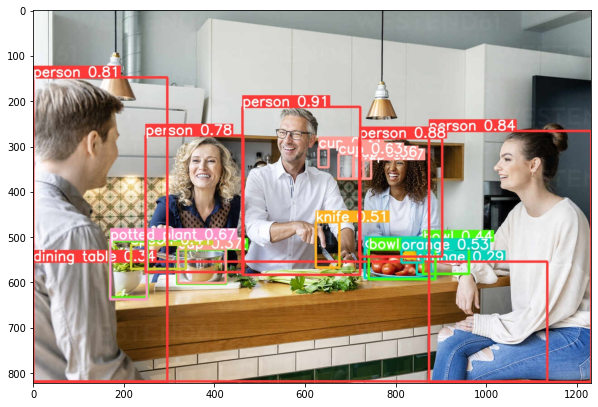

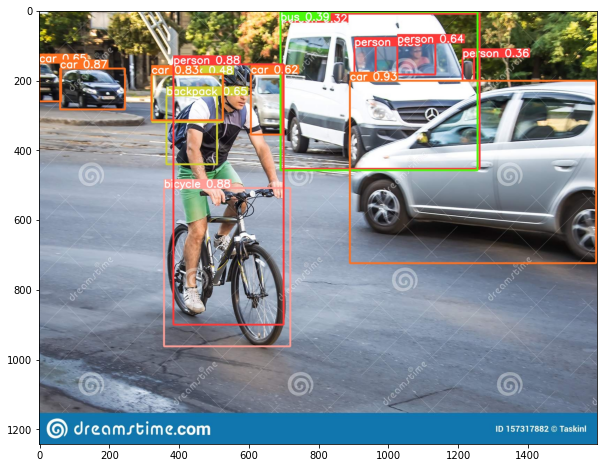

In [5]:
from glob import glob 
from matplotlib import pyplot as plt 
import cv2
temp_imgs = glob('/content/yolov5/runs/detect/exp/*.jpg') #<---- exp 숫자 확인 
for temp in temp_imgs:
  temp_img = cv2.imread(temp)
  temp_img = cv2.cvtColor(temp_img,cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10,8))
  plt.imshow(temp_img)
  plt.show()

# 4- Custom Data : Mask 데이터
 - 특정 규칙만 맞춰서 데이터를 만들어 주면 다른 데이터 들로 Objects Detection 학습 가능 

- 아래 트리 구조 처럼 train 폴더 안에 images, labels 형태로 폴더를 만들고 이미지와 라벨 파일들을 폴더 내에 저장하면 됨 

- 그 이후의 과정은 위 과정과 모두 동일 함 

 - 데이터셋만 마스크 데이터를 사용하며, 나머지 과정은 모두 동일함 


In [ ]:
!tree -L 2 -f

.
├── ./data.yaml
├── ./README.roboflow.txt
├── ./train
│   ├── ./train/images
│   ├── ./train/labels
│   └── ./train/labels.cache
└── ./valid
    ├── ./valid/images
    ├── ./valid/labels
    └── ./valid/labels.cache

6 directories, 4 files


In [6]:
%cd /content/
%mkdir /content/yolov5_mask
%cd /content/yolov5_mask/

/content
/content/yolov5_mask


## 4-1 데이터 다운로드

In [ ]:
import yaml

# 학습 데이터 다운로드

!curl -L "https://app.roboflow.com/ds/UDw102Apji?key=9OZpzHulse" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

with open('/content/yolov5_mask/data.yaml', 'r') as f:
  data = yaml.load(f,Loader=yaml.FullLoader)

print(data)
data['names'] = ['mask','no-mask']

data['train'] = '/content/yolov5_mask/train/'
data['val'] = '/content/yolov5_mask/valid/'

with open('/content/yolov5_mask/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)
%cat /content/yolov5_mask/data.yaml

## 4-2 학습 

In [ ]:
#YOLOV5s를 기반으로 
%cd /content/yolov5
img_size = 640 
batch_size =16 
num_epochs = 100
datasets = '/content/yolov5_mask/data.yaml'
weight = 'yolov5s.pt'
!python3 train.py --img {img_size} --batch {batch_size} --epochs {num_epochs} --data {datasets} --weights {weight} --cache

## 4-3 추론 

In [ ]:
# %cd /content/
# %mkdir /content/mask_image
# %cd /content/mask_image
# !wget https://st2.depositphotos.com/1037987/10271/i/450/depositphotos_102717344-stock-photo-hispanic-father-and-adult-son.jpg
# %cd /content/
weight_path = '/content/mask_x_trained.pt'
data_path = '/content/mask_image'
!python3 /content/yolov5/detect.py --weights {weight_path} --img 640 --conf 0.25 --source {data_path}

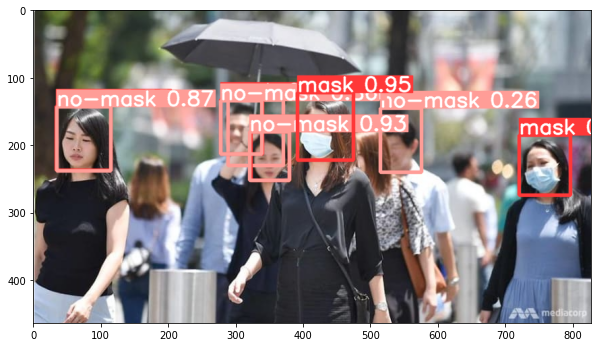

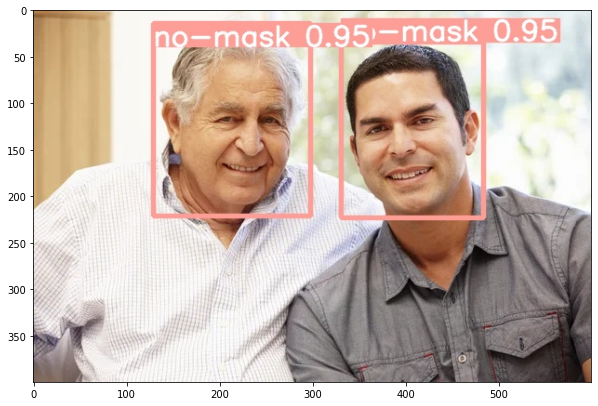

In [28]:
from glob import glob 
from matplotlib import pyplot as plt 
import cv2
temp_imgs = glob('/content/yolov5/runs/detect/exp3/*') #<---- exp 숫자 확인 
for temp in temp_imgs:
  temp_img = cv2.imread(temp)
  temp_img = cv2.cvtColor(temp_img,cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10,8))
  plt.imshow(temp_img)
  plt.show()

#6- Webcam을 활용

1. 웹캠으로 입력 된 이미지로 바로 Object Detection을 진행할 수 있음 
2. YOLOv5에는 이러한 기능이 내장되어 있어 `--source 0` 로 세팅해서 detect.py를 실행시킬 경우 바로 가능 
3. 하지만 코랩에서는 이것이 불가능하기 때문에 로컬에서 진행해야 함 
4. 코랩에서 모델을 학습시킨 뒤 이를 다운로드 
5. 그 후 로컬에서 아나콘다 프롬프트 실행 

6. 로컬에서 YOLOv5 git을 clone 함 

```
git clone https://github.com/ultralytics/yolov5  # clone
```

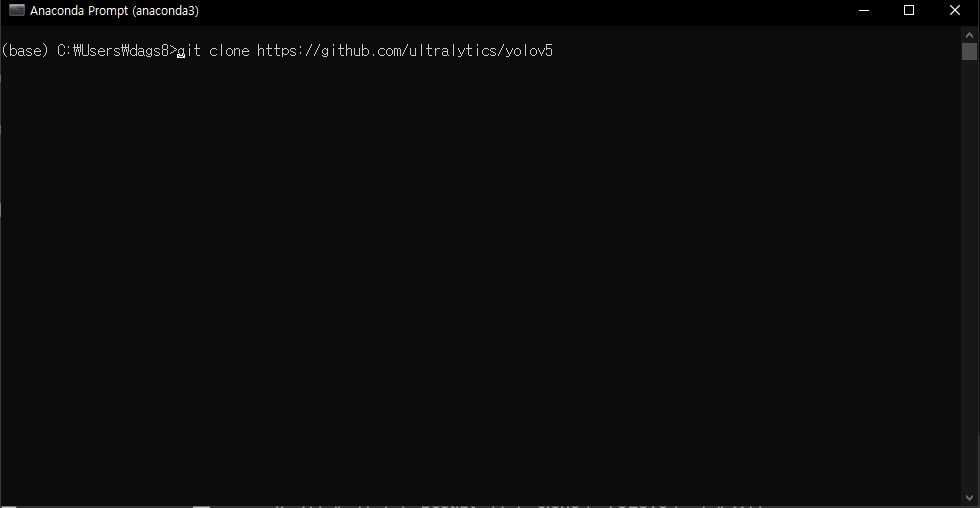

7. 처음에 다운받은 best.pt 파일을 clone 한 YOLOv5 폴더에 넣음 
8. 다시 프롬프트를 키고 cd ./yolov5 를 입력해서 디렉토리 변경 
9. detect.py 파일 실행 

```
python detect.py --source 0 --weights best.pt --conf 0.6
```